In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import copy  #serve a copiare i valori delle variabili (ad esempio in LU fattorizzazione)

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, \pi\}
$$

Given the following $4^{th}$ order finite difference approximation of the second order derivative:

$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2}$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, the boundary conditions, returns the matrix $A$ and the the right hand side $b$.

In [15]:
def finDif(omega,f,n,bc):
    h=(omega[1]-omega[0])/(n-1)  #definisce stepsize h
    
    x = zeros(n)
    b = zeros(n)
    for i in range (0,n):   #ciclo in cui calcolare punti di discretizzazione e i valori della funzione in tali punti
      x[i]=i*h    #punti di discretizzazione
      b[i]=f(x[i])   #valore della funzione in punti di discretizzazione
    
    b[0], b[-1]=bc   #condizioni al confine
    


#crea matrice A
    A = diag([-1 for i in range(0,n-2)], -2)  \
    + diag([16 for i in range(0,n-1)], -1)    \
    + diag([-30 for i in range(0,n)])         \
    + diag([16 for i in range(0,n-1)], 1)     \
    + diag([-1 for i in range(0,n-2)], 2)      
    
    A=-A/(12*h**2)    #normalizzazione e cambio segno


    return A, b

Call the function using:

In [16]:
omega = [0,pi]
f = lambda x : sin(x)
n=100
bc = [0,0]
A, b = finDif(omega, f, n, bc)

In [17]:
A, b

(array([[ 2482.6223022 , -1324.06522784,    82.75407674, ...,
             0.        ,     0.        ,     0.        ],
        [-1324.06522784,  2482.6223022 , -1324.06522784, ...,
             0.        ,     0.        ,     0.        ],
        [   82.75407674, -1324.06522784,  2482.6223022 , ...,
             0.        ,     0.        ,     0.        ],
        ...,
        [    0.        ,     0.        ,     0.        , ...,
          2482.6223022 , -1324.06522784,    82.75407674],
        [    0.        ,     0.        ,     0.        , ...,
         -1324.06522784,  2482.6223022 , -1324.06522784],
        [    0.        ,     0.        ,     0.        , ...,
            82.75407674, -1324.06522784,  2482.6223022 ]]),
 array([0.        , 0.03172793, 0.06342392, 0.09505604, 0.12659245,
        0.1580014 , 0.18925124, 0.22031053, 0.25114799, 0.28173256,
        0.31203345, 0.34202014, 0.37166246, 0.40093054, 0.42979491,
        0.45822652, 0.48619674, 0.51367739, 0.54064082, 0.567

Implement two functions that compute the LU and the Cholesky factorization of the system matrix $A$

In [18]:
def LU(A):

    U=copy.copy(A)
    L=zeros((n,n)) 
    
    for i in range(0, n):
      for j in range(i+1, n):
        L[j,i]=U[j,i]/U[i,i]
        U[j]=U[j]-L[j,i]*U[i]

    fill_diagonal(L, 1) # Diagonale di matrice L uguale a 1 per ridurre numero di operazioni per risoluzione
    
    return L, U

L, U = LU(A)

In [19]:
L, U

(array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.53333333,  1.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.03333333, -0.72049689,  1.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -1.06167995,
          1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.07107041,
         -1.06178128,  1.        ]]),
 array([[ 2482.6223022 , -1324.06522784,    82.75407674, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,  1776.45418068, -1279.92972024, ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,  1557.67844447, ...,
             0.        ,     0.        ,     0.        ],
        ...,


In [20]:
def cholesky(A):
    L=zeros((n,n))
    L[0,0]=A[0,0]**0.5
    
    for i in range(1,n):
      for  j in range(i):
        L[j, i]=(A[i,j]-dot(L[:j,i], L[:j,j]))/L[j,j]
      L[i,i]=(A[i,i]-dot(L[:i,i], L[:i,i]))**0.5  
    
    return L, L.transpose()
HT, H = cholesky(A)

In [21]:
HT, H

(array([[ 49.82591998, -26.57382399,   1.660864  , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  42.14800328, -30.36750547, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,  39.46743524, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,  34.12324103,
         -36.22796085,   2.42515289],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
          34.12149473, -36.2295642 ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,  34.11978332]]),
 array([[ 49.82591998,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [-26.57382399,  42.14800328,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  1.660864  , -30.36750547,  39.46743524, ...,   0.        ,
           0.        ,   0.        ],
        ...,


Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [22]:
def L_solve(L,rhs):   #rhs == right hand side (b)

    x=zeros(n)    
    x[0]=rhs[0]/L[0,0]
    
    for i in range (1, n):
      x[i]=(rhs[i]-dot(L[i,:i], x[:i]))/L[i,i]
    
    
    
    return x

In [23]:
def U_solve(U,rhs):
    
    x=zeros(n)    
    x[n-1]=rhs[n-1]/U[n-1,n-1]     
    
    for i in range (n-1, -1, -1):    #ciclo da n-1 fino a zero(incluso) con decremento di -1
      x[i] = ( rhs[i] - dot(U[i, i+1:], x[i+1:]) ) / U[i, i]   
        
    
    return x

Solve the derived linear system using the implemented functions and plot the computed solution:

In [24]:
#data matrice A e right hand side b, trova fattorizzazione LU e risolve il sistema così trovato
def solve_system(A, b):   
  
  
  L, U = LU(A)
    
  y=L_solve(L, b)  
  x=U_solve(U, y)
    
  return x

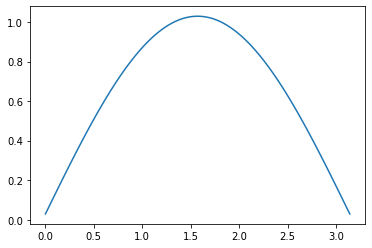

In [12]:
A, b = finDif(omega, f, n, bc)
sol=solve_system(A, b)
plot(linspace(omega[0], omega[1], num=n), sol)
show()

Considering the new domain $\Omega = (0,1)$ and the forcing term $f(x) = x(1-x)$ with B.C. $u(x) = 0$, on $\partial \Omega = {0,1}$ produce a plot and a table where you show the decay of the error w.r.t. the number of grid points.
(The analytical solution for the above problems is $u_{an} = \frac{x^4}{12} - \frac{x^3}{6} + \frac{x}{12}$)

In [116]:
#definisco i nuovi parametri del problema
omega = [0,1]
f = lambda x : x*(1-x)
f_analytical= lambda x : ((x**4)/12) -((x**3)/6) + (x/12)
n=100     
bc = [0,0]

In [130]:
#funzione per calcolare l'errore
def error(omega, f, n, bc):
  h=(omega[1]-omega[0])/(n-1)
  x = zeros(n)   #calcolo i valori della funzione analitica negli n punti di approssimazione
  reale=zeros(n)
  for i in range (0,n):  
    x[i]=i*h    
    reale[i]=f_analytical(x[i]) 
  
  cal=solve_system(omega, f, n, bc)   #calcolo l'approx della funzione negli n punti
  err= max(abs(cal-reale))   #errore dell'approx, definito come il valore massimo della differenza fra approx e valore reale negli n p.ti
  return err

In [ ]:
#calcolo errore in 10 punti significativi per tabella
errore=zeros(10)  
i=0
for n in (50, 100, 150, 200, 250, 300, 350, 400, 450, 500):    #per 10 valori di n computo l'errore
 errore[i]=error(omega, f, n, bc)
 i=i+1

In [138]:
#calcolo errore in tutto il range per il plot
errore_plot=zeros(500)  
i=0
for n in range(2, 500):    #per 498 valori di n computo l'errore
 errore_plot[i]=error(omega, f, n, bc)
 i=i+1

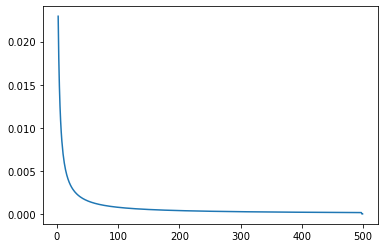

/tmp/ipykernel_10453/4147964188.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.style.hide_index()


#points,error
50,0.001578
100,0.000781
150,0.000519
200,0.000389
250,0.000311
300,0.000259
350,0.000222
400,0.000194
450,0.000172
500,0.000155


In [183]:
#plot
plot(range(2,500), errore_plot[2:500])  #plot dell'errore in funzione del numero di punti di approssimazione (da 2 a 500)
show()

#tabella
import pandas
data = {'#points': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'error': errore}
df = pandas.DataFrame(data=data)
df.style.hide_index()

Exploit the derived LU factorizations to compute the condition number of the system's matrix $A$ using the original problem formulation.

In [4]:
#parametri problema originale
omega = [0,pi]
f = lambda x : sin(x)
n=100
bc = [0,0]
A, b = finDif(omega, f, n, bc)

Compute the inverse of the matrix A exploiting the derived LU factorization

In [25]:
def inverse(A):
  
  L, U =LU(A)  #fattorizzazione LU
  inv_A=copy.copy(A)    
  I = identity(shape(A)[0])

  for k in range(shape(A)[0]):
    X = L_solve(L, I[:, k])
    inv_A[:, k] = U_solve(U, X)
  
  return inv_A

In [47]:
def condNumb(A):
    inv_A=inverse(A)
    condNu = max(sum(abs(A), axis=1))*max(sum(abs(inv_A), axis=1))    #calcola condition number

    return condNu

In [48]:
cond=condNumb(A)
cond

6778.960726779696

Implement a preconditioned Conjugant Gradient method to solve the original linear system of equations using an iterative method:

In [42]:
def conjugate_gradient(A, b, nmax=len(A), eps=1e-10):
    
  #inizializzazione parametri metodo
  P = identity(shape(A)[0])   #in questo caso uso matrice identità come preconditioner 
  x=zeros(n)                  
  r=b-A.dot(x)
  z=solve_system(P, r)
  p=copy.copy(z)

    #applicazione metodo
  for k in range (1, nmax):
    if linalg.norm(r) < eps:    #quando incremento è sufficientemente piccolo interrompe il ciclo
      break
        
    alpha = p.dot(r) / A.dot(p).dot(p)
    x=x+alpha*p
    r=r-alpha*A.dot(p)
    z=solve_system(P, r)
    beta = A.dot(p).dot(z) / A.dot(p).dot(p)
    p = z - beta*p
        
  return x

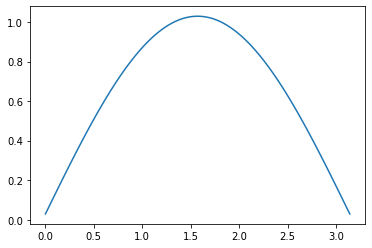

In [45]:
#applico funzione appena definita a problema originale
sol_conj=conjugate_gradient(A, b)
plot(linspace(omega[0], omega[1], num=n), sol_conj)
show()

Given the original $Au = b$ system, implement an algorithm to compute the eigenvalues and eigenvectors of the matrix $A$. Exploit the computed LU factorization

In [4]:
#parametri problema originale
omega = [0,pi]
f = lambda x : sin(x)
n=100
bc = [0,0]
A, b = finDif(omega, f, n, bc)

In [85]:
#power method per cercare autovalore massimo
def Power_Method(A, tol=1e-5,nmax=5000):
  z0=ones(n) #valore iniziale arbitrario 
  i=0
  q = z0/linalg.norm(z0)  
  err=tol+1  
  while i<nmax and err>tol:
    z=dot(A,q)
    l=dot(q.T,z)
    err=linalg.norm(z-l*q)
    q=z/linalg.norm(z)
    i=i+1 
    
  print("error =", err, "iterations =", i)
  print("lambda_max =", l)

  return l,q

 
#usa fattorizzazione LU in calcolo matrice inversa
#inverse power method per cercare autovalore minimo 
def Inverse_Power_Method(A, tol=1e-5,nmax=5000):   
  z0=ones(n) #valore iniziale arbitrario
  i=0
  q = z0/linalg.norm(z0)  
  err=tol+1  
  while i<nmax and err>tol:
    z=dot(inverse(A),q)
    mu=dot(q.T,z)
    err=linalg.norm(z-mu*q)
    q=z/linalg.norm(z)
    i=i+1 
    
  print("error =", err, "iterations =", i)
  print("lambda_min =", 1/mu)

  return 1/mu,q

#inverse shifted power method per trovare autovalore vicino a un dato valore. 
def Inverse_Shifted_Power_Method(A, const, tol=1e-5,nmax=50):    #const valore vicino cui cercare
    
  I = identity(shape(A)[0])
  A_const=A-const*I
  z0=ones(n) #valore iniziale arbitrario
  i=0
  q = z0/linalg.norm(z0)  
  err=tol+1  
  while i<nmax and err>tol:
    z=dot(inverse(A_const),q)
    l_const=1/dot(q.T,z)
    err=1/linalg.norm(z-l_const*q)   #errore è 1/linalg.norm(z-l_const*q) o linalg.norm(z-l_const*q)?
    q=z/linalg.norm(z)
    i=i+1 
    
  print("error =", err, "iterations =", i)
  print("lambda_int =", l_const+const)

  return l_const+const,q

In [74]:
#calcola autovalori minimi e massimi
l_max, q_max=Power_Method(A)
l_min, q_min=Inverse_Power_Method(A)

error = 9.989064856278863e-06 iterations = 4186
lambda_max = 5289.872312277477
error = 5.205144222222629e-06 iterations = 6
lambda_min = 0.9637373624502266


In [88]:
#possibile modo per calcolare gli autovalori intermedi:

#conoscendo autovalori min/max implementare funzione in ciclo per vari valori inclusi in min/max, considero step  (l_max-l_min)/n
#come considerare molteplicità autovalori? possibile soluzione: if l(i)==l(i+1)+-errore  ->salva in altra tupla 

#molto lento, interrotto prima di finire esecuzione
#l=zeros(n)
#q=zeros(n)
#for const in range(l_min, l_max, (l_max-l_min)/n):
#  l, q=Inverse_Shifted_Power_Method(A, const)




Consider the following time dependent variation of the PDE starting from the orginal problem formulation:
$$
u'(t)-u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $\alpha(t) = \cos(t)$ and $T = 6\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method.

Plot the time dependent solution solution at $x = \pi/2$, $x=1$, 
$x=\pi$


In [54]:
def Forward_Euler(omegat, omega, nt, n, bc, f, alpha):
  
  h=(omegat[1]-omegat[0])/nt                    #stepsize
  t=linspace(omegat[0], omegat[1], num=nt+1)           #punti di approx t 
  u=zeros((n, nt+1))                                       #inizializzo matrice u, corrispondente a u(x,t), di dimensione n(x)*n_t(t) 
  
  A, b = finDif(omega, f, n, bc)
  x=linspace(omega[0], omega[1], num = shape(b)[0])     #punti di approx x 
      
  I = identity(shape(A)[0])
  u[:, 0]=solve_system(A, b)  
  
  for k in range(nt):
    u[:,k+1] = (I - A*h).dot(u[:, k]) + h*alpha(t[k])*b
  
  return u, t, x

In [55]:
#inizializzazione parametri problema:
#problema originale
omega = [0, pi]
f = lambda x : sin(x)
n=100
bc = [0,0]

#time dependent variation of the PDE
omegat = [0, 6*pi]
alpha = lambda x : cos(x)
nt=1000000   #nt deve essere molto grande, altrimenti h è troppo grande e u[:,k] diverge

u, t, x=Forward_Euler(omegat, omega, nt, n, bc, f, alpha)

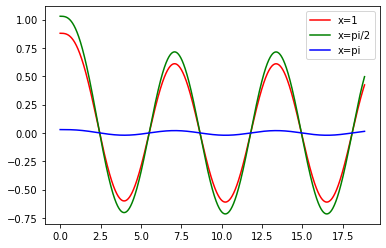

In [58]:
#plots

plot(t, u[argmin(abs(x-1)),:], c="r", label="x=1")   #si seleziona valore di x più vicino a valore voluto
plot(t, u[argmin(abs(x-pi/2)),:], c="g", label="x=pi/2") 
plot(t, u[argmin(abs(x-pi)),:], c="b", label="x=pi") 
legend()
show()

Consider the following Cauchy problem
$$
\begin{cases}
y'= -ty^2 \quad 0\le t \le 2\\
y(0) = 1
\end{cases}
$$
Implement a Backward Euler's method in a suitable function and solve the resulting non-linear equation using a Newton's method.

In [45]:
def Newton(f, df, x, tol=1e-10, nmax=5000):
  for i in range(nmax):
    x=x-f(x)/df(x)
    if( abs(f(x)) < tol ):
      return x
    return x
    








def Backward_Euler(omega, n, y0):
  
  h=(omega[1]-omega[0])/n                    #stepsize
  t=linspace(omega[0], omega[1], num=n+1)           #punti di approx t 
  y=zeros(n+1)                                       #inizializzo matrice u, corrispondente a u(x,t), di dimensione n(x)*n_t(t) 
  y[0]=y0
  
  for k in range(1, n+1):
    f=lambda x: x-y[k-1]+h*t[k]*x**2    
    df=lambda x: 1+2*h*t[k]*x
    y[k]=Newton(f, df, y[k-1])
  
  return t, y

In [46]:
#inizializzazione parametri problema:
omega = [0, 2]
n=100
y0=1

t, y=Backward_Euler(omega, n, y0)

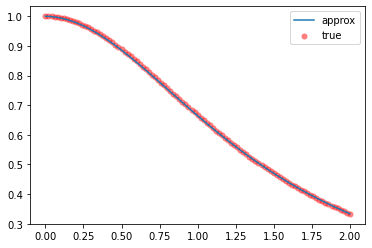

In [49]:
plot(t, y, label="approx")
#sol esatta di cauchy è 2/(2+t^2)
scatter(t, 2/(2+t**2), c="r", linewidths=0.01, alpha=0., label="true")
legend()
show()